<font size="5"><b>1.- Importing libraries </b></font>

In [264]:
#!pip install textblob
#nltk.download('stopwords')
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
#!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felipe.gibert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font size="5"><b>2.- Reading and analyzing the data</b></font>

In [265]:
df = pd.read_csv('Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')
df

Review  Liked
0    "I also had to taste my Mom's multi-grain pump...      1
1            "I'd rather eat airline food, seriously."      0
2        Cant say enough good things about this place.      1
3                         The ambiance was incredible.      1
4            The waitress and manager are so friendly.      1
..                                                 ...    ...
495  "Worse of all, he humiliated his worker right ...      0
496                    CONCLUSION: Very filling meals.      1
497  Their daily specials are always a hit with my ...      1
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

[500 rows x 2 columns]

In [266]:
df.describe()

Liked
count  500.000000
mean     0.500000
std      0.500501
min      0.000000
25%      0.000000
50%      0.500000
75%      1.000000
max      1.000000

In [267]:
df.isnull().sum() #Checking for null values

Review    0
Liked     0
dtype: int64

<font size="5"><b>3.- Data treatment </b></font>

In [268]:
#Defining to new data frames.

Review_df = df.drop(['Liked'],axis=1) #Dataframe with just the review
Review_df

Liked_df = df['Liked'] #Dataframe with just the calification or 'likes'
Liked_df

0      1
1      0
2      1
3      1
4      1
      ..
495    0
496    1
497    1
498    1
499    1
Name: Liked, Length: 500, dtype: int64

In [269]:
#Converting the data frame to a list
#With this we also cehck if the words are correct and in which format they are

Review_list = Review_df.values.tolist()
Review_list

[['"I also had to taste my Mom\'s multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!"'],
 ['"I\'d rather eat airline food, seriously."'],
 ['Cant say enough good things about this place.'],
 ['The ambiance was incredible.'],
 ['The waitress and manager are so friendly.'],
 ['I would not recommend this place.'],
 ["Overall I wasn't very impressed with Noca."],
 ['My gyro was basically lettuce only.'],
 ['Terrible service!'],
 ['Thoroughly disappointed!'],
 ['"I don\'t each much pasta, but I love the homemade /hand made pastas and thin pizzas here."'],
 ['"Give it a try, you will be happy you did."'],
 ['By far the BEST cheesecurds we have ever had!'],
 ['Reasonably priced also!'],
 ['Everything was perfect the night we were in.'],
 ['The food is very good for your typical bar food.'],
 ['it was a drive to get there.'],
 ['"At first glance it is a lovely bakery cafe - nice ambiance, clean, friendly staff."'],
 ['"Anyway, I do not think i will go 

In [270]:
#Correcting the words that could be mispelled
#This code takes a little bit to load, please be patient 
Review_listc = []

for i  in range(0,500):
    testimonial = TextBlob(Review_list[i][0])
    a = str(testimonial.correct())
    Review_listc.append(a)

Review_listc[1]


'"I\'d rather eat airline food, seriously."'

In [271]:
#Using stemmer to get the root of the words
# I did this because I believe that is easier to find the sentiment for the original words.

corpus = [] 

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', Review_listc[i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) 
    corpus.append(review) #Generate a list of one string per observation
corpus

['also tast tom multi grain pushkin pancak butter amaz fluffi delici',
 'rather eat airlin food serious',
 'want say enough good thing place',
 'allianc incred',
 'wit manag friendli',
 'would recommend place',
 'overal impress local',
 'go basic lectur',
 'terribl servic',
 'thoroughli disappoint',
 'much past love homemad hand made part thin pizza',
 'give tri happi',
 'far best cheesecurd ever',
 'reason price also',
 'everyth perfect night',
 'food good typic bar food',
 'drive get',
 'first glanc love baker cafe nice allianc clean friendli staff',
 'anyway think go back',
 'joint finger item menu order disappoint',
 'oh thing beauti bar',
 'gone',
 'greasi unhealthi meal',
 'first time might last',
 'burgher amaz',
 'similarli deliveri man say word apolog food minut late',
 'way expens',
 'sure order dessert even need pack go tiramisu cannot die',
 'first time wait next',
 'bartend also nice',
 'everyth good tast',
 'place two thumb way',
 'best place began breakfast check run',
 

In [272]:
#Creating 2 list with polarity and Subjectivity of the words
Sentiment_Values_Polarity = []
Sentiment_Values_Subjectivity = []

for i  in range(500):
    testimonial = TextBlob(Review_listc[i])
    a = testimonial.sentiment.polarity
    Sentiment_Values_Polarity.append(a)
    
for i  in range(500):
    testimonial = TextBlob(Review_listc[i])
    a = testimonial.sentiment.subjectivity
    Sentiment_Values_Subjectivity.append(a)


In [273]:
Sentiment_Values_Polarity

[0.46666666666666673,
 -0.3333333333333333,
 0.35,
 0.9,
 0.375,
 0.0,
 0.3333333333333333,
 0.0,
 -1.0,
 -0.9375,
 -0.05000000000000001,
 0.8,
 0.55,
 0.25,
 1.0,
 0.37166666666666665,
 0.0,
 0.41833333333333333,
 0.0,
 -0.75,
 0.0,
 0.0,
 -0.4,
 0.125,
 0.6000000000000001,
 -0.15,
 -0.5,
 0.5,
 0.125,
 0.6,
 0.875,
 0.0,
 1.0,
 0.45,
 -1.0,
 0.6454545454545454,
 0.0,
 0.7500000000000001,
 -1.0,
 1.0,
 0.7500000000000001,
 0.0,
 0.3,
 -0.05,
 0.0,
 0.3333333333333333,
 0.2,
 0.2857142857142857,
 -0.05,
 0.3125,
 -0.2125,
 0.0,
 0.0,
 0.0,
 0.28888888888888886,
 0.0625,
 0.0,
 -0.2972222222222222,
 1.0,
 0.0,
 -0.022222222222222216,
 -1.0,
 0.875,
 0.4000000000000001,
 0.8,
 0.0,
 0.06666666666666667,
 0.85,
 -0.3333333333333333,
 0.0,
 0.11818181818181818,
 -0.17500000000000002,
 0.0,
 0.5,
 0.4777777777777778,
 0.02777777777777779,
 -0.75,
 0.6625,
 0.48750000000000004,
 0.4666666666666667,
 -0.10416666666666664,
 0.0,
 0.5,
 0.0,
 0.0,
 0.5854166666666667,
 0.0,
 -0.1888888888888888

In [274]:
Sentiment_Values_Subjectivity

[0.7666666666666666,
 0.6666666666666666,
 0.55,
 0.9,
 0.5,
 0.0,
 0.3333333333333333,
 1.0,
 1.0,
 0.75,
 0.5666666666666668,
 1.0,
 0.65,
 0.6,
 1.0,
 0.6400000000000001,
 0.0,
 0.6566666666666666,
 0.0,
 0.75,
 0.5,
 0.0,
 0.7,
 0.19999999999999998,
 0.9,
 0.5,
 0.7,
 0.8888888888888888,
 0.16666666666666666,
 1.0,
 0.6000000000000001,
 0.0,
 0.3,
 0.5416666666666666,
 1.0,
 0.7848484848484848,
 0.0,
 0.7875,
 1.0,
 0.3,
 0.9,
 1.0,
 0.5,
 0.25,
 0.0,
 0.5333333333333333,
 0.26666666666666666,
 0.5357142857142857,
 0.15,
 0.5208333333333333,
 0.55,
 0.0,
 0.0,
 0.0,
 0.39444444444444443,
 0.3375,
 0.0,
 0.5805555555555556,
 1.0,
 0.0,
 0.6277777777777778,
 1.0,
 0.6000000000000001,
 0.7166666666666667,
 0.75,
 0.0,
 0.06666666666666667,
 0.8,
 0.6666666666666666,
 0.0,
 0.42727272727272725,
 0.4083333333333334,
 0.0,
 0.5,
 0.7222222222222222,
 0.48888888888888893,
 0.75,
 0.55,
 0.65,
 0.75,
 0.6,
 0.0,
 0.75,
 0.0,
 0.0,
 0.675,
 0.0,
 0.6777777777777777,
 0.8625,
 1.0,
 0.75,
 0

In [275]:
#Creating 2 dataframes using the previous lists
SV_df = pd.DataFrame(Sentiment_Values_Polarity)
SV_df.columns = ['Polarity']
SV_df

ST_df = pd.DataFrame(Sentiment_Values_Subjectivity)
ST_df.columns = ['Subjectivity']
ST_df

Subjectivity
0        0.766667
1        0.666667
2        0.550000
3        0.900000
4        0.500000
..            ...
495      0.767857
496      0.300000
497      0.285714
498      0.676190
499      0.666667

[500 rows x 1 columns]

In [277]:
#Putting all the data frames together for a better view
A_df=pd.concat([Review_df,Liked_df,SV_df, ST_df],axis=1)
A_df

Review  Liked  Polarity  \
0    "I also had to taste my Mom's multi-grain pump...      1  0.466667   
1            "I'd rather eat airline food, seriously."      0 -0.333333   
2        Cant say enough good things about this place.      1  0.350000   
3                         The ambiance was incredible.      1  0.900000   
4            The waitress and manager are so friendly.      1  0.375000   
..                                                 ...    ...       ...   
495  "Worse of all, he humiliated his worker right ...      0 -0.357143   
496                    CONCLUSION: Very filling meals.      1  0.200000   
497  Their daily specials are always a hit with my ...      1  0.178571   
498  The pancake was also really good and pretty la...      1  0.388095   
499  "This was my first crawfish experience, and it...      1  0.625000   

     Subjectivity  
0        0.766667  
1        0.666667  
2        0.550000  
3        0.900000  
4        0.500000  
..            ...  
495      0.767857  
496      0.300000  
497      0.285714  
498      0.676190  
499      0.666667  

[500 rows x 4 columns]

In [278]:
#Putting some data frames together for a future analysis and covnerting them to an array
Analysis_df = pd.concat([SV_df,ST_df], axis=1)
Analysis_Array = Analysis_df.to_numpy()


Liked_Array = Liked_df.to_numpy()
Analysis_Array
Liked_Array

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,

<font size="5"><b>4.- Using neural networks method (ANN)</b></font>

In [279]:
#Defining the data we are going to use to feed the model
training_data = Analysis_Array
target_data = Liked_Array

print(np.c_[training_data, target_data])

[[ 0.46666667  0.76666667  1.        ]
 [-0.33333333  0.66666667  0.        ]
 [ 0.35        0.55        1.        ]
 ...
 [ 0.17857143  0.28571429  1.        ]
 [ 0.38809524  0.67619048  1.        ]
 [ 0.625       0.66666667  1.        ]]


In [340]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation

#Defining the base model
model = Sequential()

#Defining the inputlayer
model.add(InputLayer(input_shape=training_data.shape[1:]))

#Defining the hidden layers

model.add(Dense(20, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))

#Defining the output layers
model.add(Dense(1, activation='sigmoid')) 

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [341]:
model.fit(training_data, target_data, epochs=80, batch_size=25, verbose=1) # Training model
model.save('Restaurant_model') # Saving model

Train on 500 samples
Epoch 1/80
500/500 [==============================] - 0s 536us/sample - loss: 0.2504 - accuracy: 0.5000
Epoch 2/80
500/500 [==============================] - 0s 56us/sample - loss: 0.2483 - accuracy: 0.5080
Epoch 3/80
500/500 [==============================] - 0s 48us/sample - loss: 0.2466 - accuracy: 0.5260
Epoch 4/80
500/500 [==============================] - 0s 44us/sample - loss: 0.2453 - accuracy: 0.6760
Epoch 5/80
500/500 [==============================] - 0s 50us/sample - loss: 0.2444 - accuracy: 0.7220
Epoch 6/80
500/500 [==============================] - 0s 52us/sample - loss: 0.2435 - accuracy: 0.7500
Epoch 7/80
500/500 [==============================] - 0s 50us/sample - loss: 0.2427 - accuracy: 0.7280
Epoch 8/80
500/500 [==============================] - 0s 48us/sample - loss: 0.2420 - accuracy: 0.7620
Epoch 9/80
500/500 [==============================] - 0s 46us/sample - loss: 0.2413 - accuracy: 0.7620
Epoch 10/80
500/500 [==============================

<b><u> Comments about the model </b></u>

I want to start using ANN because I feel is like the fastest one to get a good result, and use this result as a base case to see which model is better

I choosed the 'relu' function as the fucntion for the hidden layer because based in what I read is the best one to use because in the way it acts, giving values from 0 to infinite

In the utput layer I choosed the 'Sigmoid' function because we are triying to estimate 1 and 0, and that function does eaxctly that

Finally I choose to pick that number of layers and neurons because after abot 30 diferents test thats the combination that give the best accuracy 0.796 in my case. Probably when you run this that accuracy may change but that because the 'random path' that the information follows while in the neural network.

The loss is the mean squared error between the rpedted value and the original one.

<font size="5"><b>5.- Generating new models using logistic and gaussian</b></font>

Taking in consdeiration all the variables

In [336]:
#Logistic Model and Gaussian Model 1

#Re- Defining target variable and dependent variables

Y = Liked_Array
X = Analysis_df

#Splitting the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)


# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train,Y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

nb_cm = confusion_matrix(Y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(Y_test, lr_y_pred)
print(lr_cm)

print("Accuracy Logistic = 0.826") #Calculated by hand #(66+58)/(66+58+14+12)
print("Accuracy Gaussian = 0.820") #Calculated by hand #(67+56)/(67+56+16+11)

[[60 12]
 [26 52]]
[[60 12]
 [28 50]]
Accuracy Logistic = 0.826
Accuracy Gaussian = 0.820


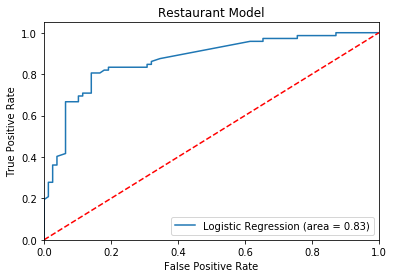

In [316]:
#Creating a ROC curve to better vizualization of logistc regression
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Restaurant Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [317]:
#Generating a summary for the logistic regression model

model = sm.Logit(Y_train,X_train)

print(model.fit().prsquared)

model.fit().pvalues

results=model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.510606
         Iterations 7
0.26319448744045504
Optimization terminated successfully.
         Current function value: 0.510606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.510606
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  350
Model:                          Logit   Df Residuals:                      348
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.2632
Time:                        12:18:09   Log-Likelihood:                -178.71
converged:                       True   LL-Null:                       -242.55
                                        LLR p-value:                 1.322e-29
                   coef    std err        

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.865
Logistic: ROC AUC=0.862


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold       tpr       fpr
0    1.935362  0.000000  0.000000
1    0.935362  0.069444  0.000000
2    0.917005  0.097222  0.000000
3    0.914231  0.125000  0.000000
4    0.895203  0.180556  0.000000
5    0.878189  0.194444  0.012821
6    0.863432  0.236111  0.012821
7    0.851850  0.263889  0.012821
8    0.846645  0.263889  0.025641
9    0.812909  0.388889  0.025641
10   0.812227  0.388889  0.038462
11   0.798912  0.430556  0.038462
12   0.794385  0.444444  0.064103
13   0.725479  0.611111  0.064103
14   0.714532  0.638889  0.064103
15   0.669588  0.666667  0.064103
16   0.634498  0.666667  0.102564
17   0.624040  0.680556  0.102564
18   0.619816  0.680556  0.115385
19   0.607331  0.694444  0.115385
20   0.588608  0.694444  0.128205
21   0.563667  0.736111  0.128205
22   0.562382  0.736111  0.141026
23   0.560092  0.763889  0.141026
24   0.546574  0.763889  0.153846
25   0.497620  0.819444  0.153846
26   0.491460  0.819444  0.166667
27   0.486998  0.833333  0.179487
28   0.460918  0.833333  0.205128
29   0.440013  0.833333  0.230769
30   0.423388  0.833333  0.269231
31   0.413142  0.833333  0.282051
32   0.409292  0.847222  0.282051
33   0.407654  0.847222  0.294872
34   0.390597  0.861111  0.294872
35   0.327211  0.861111  0.346154
36   0.287980  0.875000  0.371795
37   0.278301  0.875000  0.410256
38   0.244237  0.958333  0.679487
39   0.219138  0.958333  0.705128
40   0.198668  0.972222  0.705128
41   0.173805  0.972222  0.782051
42   0.169057  0.986111  0.782051
43   0.162472  0.986111  0.807692
44   0.147727  0.986111  0.833333
45   0.088536  0.986111  0.871795
46   0.060391  1.000000  0.871795
47   0.008649  1.000000  0.948718
48   0.008285  1.000000  1.000000

threshold       tpr       fpr
0    1.934859  0.000000  0.000000
1    0.934859  0.069444  0.000000
2    0.929852  0.097222  0.000000
3    0.871057  0.180556  0.000000
4    0.845509  0.194444  0.012821
5    0.808294  0.263889  0.012821
6    0.806530  0.291667  0.012821
7    0.801163  0.291667  0.025641
8    0.762558  0.333333  0.025641
9    0.761014  0.333333  0.038462
10   0.746456  0.402778  0.038462
11   0.745740  0.416667  0.064103
12   0.683477  0.583333  0.064103
13   0.680401  0.611111  0.064103
14   0.617315  0.666667  0.064103
15   0.577000  0.666667  0.089744
16   0.570063  0.694444  0.089744
17   0.552611  0.694444  0.141026
18   0.486655  0.805556  0.141026
19   0.467787  0.805556  0.179487
20   0.448789  0.819444  0.192308
21   0.441452  0.819444  0.217949
22   0.430400  0.833333  0.217949
23   0.414026  0.833333  0.243590
24   0.401709  0.833333  0.269231
25   0.388155  0.833333  0.307692
26   0.377433  0.847222  0.333333
27   0.374771  0.930556  0.602564
28   0.359627  0.944444  0.602564
29   0.358321  0.944444  0.615385
30   0.354202  0.958333  0.615385
31   0.349888  0.958333  0.628205
32   0.307390  0.972222  0.628205
33   0.185527  0.972222  0.794872
34   0.184780  0.986111  0.794872
35   0.176250  0.986111  0.820513
36   0.175126  0.986111  0.846154
37   0.124629  0.986111  0.871795
38   0.096100  1.000000  0.871795
39   0.035657  1.000000  0.923077
40   0.030456  1.000000  0.974359
41   0.030013  1.000000  1.000000

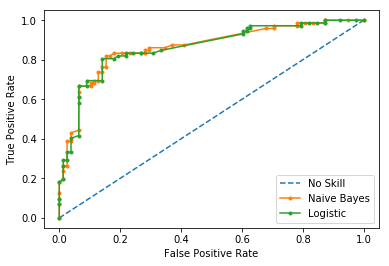

LR Sensitivity: 0.8055555555555556
LR Specificity: 0.8205128205128205
NB Sensitivity: 0.8333333333333334
NB Specificity: 0.8205128205128205


In [322]:
#Creating a ROC curve graph with both models together

# Define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])


# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(Y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(Y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(Y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(Y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])


#TEsted treshold that improve the models
evaluate_threshold_lr(0.467787)
evaluate_threshold_nb(0.486655)



<b><u>Comments about the model</b></u>

<u>Logistic regression</u>

We can see that in the sumarry we have an Pseudo R-squ equals to 0.2632, according to some text a 0,3 of this variable is really good (Information about the R-Mcfadden: http://sgpwe.izt.uam.mx/files/users/uami/gma/metria2/_15_Logit.pdf) 

In the other hand we can also see that Subjetivicty has a p value diferent than 0, thats says that is no predicting the model in the best way possible. So later on we are going to generate a new model without that variable to see what happen.

In the ROC curve we can see that the 'optimal' sensitivity' is around 0.8 something, if we take the threshold of 0.467787  we end with 0.805 of sensitivty and 0.820 Specificity which are really good values for the model

<u>Gaussiam regression</u>

In the ROC curve we can see that the 'optimal' sensitivity' is around 0.8 something, if we take the threshold of 0.486655  we end with  0.833 of sensitivty and 0.820 Specificity which are really good values for the model

Making in this step the gaussian model better.


<font size="5"><b> 6.- Generating new models using logistic and gaussian</b></font>


Not taking in consideration the 'Subjectivity' variable

In [337]:
#Logistic Model and Gaussian Model 2

#Re- Defining target variable and dependent variables


Y = Liked_Array
X = Analysis_df.drop(['Subjectivity'],axis=1)


#Splitting the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)


# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train,Y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(Y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(Y_test, lr_y_pred)
print(lr_cm)

print("Accuracy Logistic = 0.76") #Calculated by hand #(61+53)/(61+53+25+11)
print("Accuracy Gaussian = 0.753") #Calculated by hand #(61+52)/(61+52+26+11)

[[59 13]
 [24 54]]
[[59 13]
 [25 53]]
Accuracy Logistic = 0.76
Accuracy Gaussian = 0.753


In [324]:
#Generating a summary for the logistic regression model
model = sm.Logit(Y_train,X_train)

print(model.fit().prsquared)

model.fit().pvalues

results=model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.507003
         Iterations 6
0.2683944482136724
Optimization terminated successfully.
         Current function value: 0.507003
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507003
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  350
Model:                          Logit   Df Residuals:                      349
Method:                           MLE   Df Model:                            0
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.2684
Time:                        12:28:30   Log-Likelihood:                -177.45
converged:                       True   LL-Null:                       -242.55
                                        LLR p-value:                       nan
                 coef    std err          z

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.809
Logistic: ROC AUC=0.809


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold       tpr       fpr
0    1.931570  0.000000  0.000000
1    0.931570  0.102564  0.013889
2    0.915541  0.128205  0.013889
3    0.894263  0.166667  0.013889
4    0.882885  0.192308  0.013889
5    0.881142  0.230769  0.013889
6    0.866046  0.282051  0.027778
7    0.848706  0.294872  0.027778
8    0.839107  0.307692  0.041667
9    0.828841  0.320513  0.069444
10   0.791097  0.371795  0.069444
11   0.780407  0.423077  0.083333
12   0.728893  0.500000  0.083333
13   0.718744  0.525641  0.083333
14   0.707090  0.538462  0.083333
15   0.701113  0.576923  0.083333
16   0.669748  0.576923  0.097222
17   0.642917  0.602564  0.097222
18   0.620932  0.628205  0.097222
19   0.599961  0.653846  0.125000
20   0.584981  0.666667  0.125000
21   0.554152  0.666667  0.152778
22   0.489768  0.705128  0.152778
23   0.474791  0.705128  0.180556
24   0.456727  0.705128  0.222222
25   0.423508  0.705128  0.250000
26   0.406930  0.717949  0.250000
27   0.361846  0.717949  0.291667
28   0.357803  0.935897  0.625000
29   0.257634  0.935897  0.666667
30   0.242274  0.961538  0.666667
31   0.224396  0.961538  0.694444
32   0.194233  0.961538  0.722222
33   0.178458  0.974359  0.722222
34   0.137683  0.974359  0.750000
35   0.125489  0.987179  0.763889
36   0.120275  0.987179  0.791667
37   0.097912  0.987179  0.819444
38   0.071701  0.987179  0.847222
39   0.049841  0.987179  0.888889
40   0.045092  0.987179  0.902778
41   0.013120  1.000000  0.902778
42   0.004348  1.000000  0.916667
43   0.002957  1.000000  1.000000

threshold       tpr       fpr
0    1.945608  0.000000  0.000000
1    0.945608  0.102564  0.013889
2    0.924877  0.128205  0.013889
3    0.897103  0.166667  0.013889
4    0.882308  0.192308  0.013889
5    0.880050  0.230769  0.013889
6    0.860610  0.282051  0.027778
7    0.838596  0.294872  0.027778
8    0.826576  0.307692  0.041667
9    0.813859  0.320513  0.041667
10   0.813859  0.320513  0.069444
11   0.768385  0.371795  0.069444
12   0.755875  0.423077  0.083333
13   0.697807  0.500000  0.083333
14   0.686781  0.525641  0.083333
15   0.674278  0.538462  0.083333
16   0.667931  0.576923  0.083333
17   0.635308  0.576923  0.097222
18   0.608266  0.602564  0.097222
19   0.586657  0.628205  0.097222
20   0.566476  0.653846  0.125000
21   0.552301  0.666667  0.125000
22   0.523718  0.666667  0.152778
23   0.466274  0.705128  0.152778
24   0.453287  0.705128  0.180556
25   0.437789  0.705128  0.222222
26   0.409709  0.705128  0.250000
27   0.395875  0.717949  0.250000
28   0.358738  0.717949  0.291667
29   0.355437  0.935897  0.625000
30   0.274338  0.935897  0.666667
31   0.261891  0.961538  0.666667
32   0.247340  0.961538  0.694444
33   0.222548  0.961538  0.722222
34   0.209403  0.974359  0.722222
35   0.174540  0.974359  0.750000
36   0.163765  0.987179  0.763889
37   0.159094  0.987179  0.791667
38   0.138517  0.987179  0.819444
39   0.112863  0.987179  0.847222
40   0.089428  0.987179  0.888889
41   0.083965  0.987179  0.902778
42   0.039797  1.000000  0.902778
43   0.021240  1.000000  0.916667
44   0.017190  1.000000  1.000000

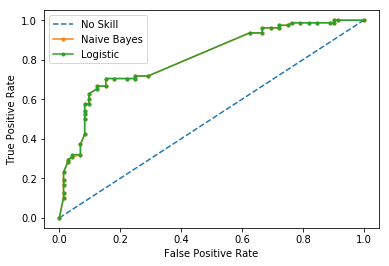

LR Sensitivity: 0.717948717948718
LR Specificity: 0.75
NB Sensitivity: 0.717948717948718
NB Specificity: 0.7083333333333333


In [328]:
#Creating a ROC curve graph with both models together

#Define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])


# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(Y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(Y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(Y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(Y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])


evaluate_threshold_lr(0.361846)
evaluate_threshold_nb(0.358738)

#evaluate_threshold_lr(0.5)
#evaluate_threshold_nb(0.5)

#evaluate_threshold_lr(0.75)
#evaluate_threshold_nb(0.75)

<b><u>Comments about the model</b></u>

<u>Logistic regression</u>
 Taking out the variable give us that the polarity variable has a P value of 0 and the R squared increase.
 
But when we analyze the ROC curve with the best treshold possible we notice that the sensitivy and specificity goes down. So taking out the variable increase some parameters but affect the model


<u>Gaussiam regression</u>

In this case the gaussian model give us less Sensitivity and Specificity so the logistic model actually become better in comparation

<font size="5"><b>7.- Using decision trees method</b></font>

In [329]:
#Re-defining variables

Y = Liked_Array
X = Analysis_df


#Splitting the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)

In [334]:
#Defining the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) 
 
from sklearn.tree import DecisionTreeClassifier 
classifer_dt= DecisionTreeClassifier(criterion='entropy',random_state=5)
classifer_dt.fit(X_train_sc,Y_train) 
y_pred_sc=classifer_dt.predict(X_test_sc) 
dt_cm = confusion_matrix(Y_test, dt_y_pred)
print(dt_cm) 

from sklearn.metrics import accuracy_score

#Calculating the accuracy of the model
print ("Accuracy :0.706")#Calculated by hand


 

[[60 17]
 [27 46]]
Accuracy :0.706


In [335]:

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) 

classifer_dt= DecisionTreeClassifier(criterion='gini',random_state=5)
classifer_dt.fit(X_train_sc,Y_train) 
dt_y_pred=classifer_dt.predict(X_test_sc) 
dt_cm = confusion_matrix(Y_test, dt_y_pred)

print(dt_cm) 

#Calculating the accuracy of the model
print ("Accuracy :0.706") #Calculated by hand
  

[[60 17]
 [27 46]]
Accuracy :0.706


<b><u>Comments about the model</b></u>

The acurracy of the model in comparison with the previous models is low, probably thats beacuse we just did 1 iteration of it.

THere is a possibily that if we repeat these process several time the accuracy will become better, but for academic purpouses and considering we have more efective models. I prefered to no iterate more and focus in improve the other options.

<font size="5"><b>8.- Final Comments </b></font>

I think that the best model is the logsitic regression with all the variable, having an 0.82 accuracy app
followed by the ANN method, this method probably can be improved but that will be some 'try and failure thing' that can take more time that the one I had for this request

At the end we can predict if a client will like or not the restaurant based on their reviews with an acurracy of around 80%

I would recommend to perform the test on the first logsitic model and in the ANN and see the diferrence to improve the ANN

In my opnion an accuracy of 80% is trustworthy for this restaurant. So go on and use the logistic model